<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Exponential%20Smoothing/simple_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2022-02-03 03:11:13--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  6.92MB/s    in 0.6s    

2022-02-03 03:11:14 (6.92 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [ ]:
close

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,...,UTX,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,V,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WMB,WMT,WM,WRK,WU,WYNN,WYN,WY,XEC,XEL,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,38.89,154.08,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,NaN,45.14,93.66,13.61,2.59,41.46,86.77,146.45,66.49,77.06,261.95,53.86,74.69,...,90.09,71.10,36.4357,59.28,46.13,56.08,84.51,54.90,45.39,46.00,67.42,44.35,39.4500,92.53,41.40,48.49,40.06,34.88,107.32,NaN,36.00,71.48,36.30,NaN,14.66,126.52,59.89,30.21,66.60,27.84,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,60.340,38.89,153.42,32.84,44.73,11.20,50.38,50.26,86.66,39.45,28.92,38.48,37.88,35.31,62.76,33.03,24.400,NaN,45.25,92.30,13.66,2.67,41.51,84.92,145.57,66.49,76.38,257.21,54.55,74.71,...,89.61,71.11,36.2119,59.31,46.14,55.65,84.80,54.62,45.66,45.70,67.70,44.32,39.0825,92.47,41.48,48.60,40.14,35.26,106.47,NaN,35.74,71.40,36.31,NaN,14.25,124.10,59.62,30.14,66.75,27.94,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,60.360,38.91,152.32,33.15,44.90,11.31,50.15,49.50,85.78,38.63,29.16,41.05,37.82,36.74,62.70,33.02,24.430,NaN,45.61,90.21,13.66,2.77,41.82,84.54,145.75,67.49,75.59,258.70,53.49,75.74,...,89.98,71.36,36.3524,59.12,45.65,56.12,85.57,54.23,45.53,45.89,68.16,44.44,39.2000,91.99,41.95,48.18,39.93,35.51,110.81,NaN,35.84,71.40,36.46,NaN,14.34,122.67,59.62,30.31,67.00,28.00,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,114.070,109.18,238.78,54.15,66.48,10.60,180.95,86.21,165.00,60.63,39.67,88.18,66.27,62.81,105.15,242.40,62.740,79.11,95.02,112.72,48.31,11.57,73.90,174.75,188.50,160.39,142.04,1390.00,99.29,156.02,...,127.24,119.62,78.6300,31.14,89.77,125.20,67.58,94.89,108.73,155.14,52.88,50.50,116.2700,203.26,70.43,81.45,61.17,58.16,171.88,157.50,29.48,100.09,81.75,63.96,19.54,165.48,116.77,34.79,107.91,43.63,66.97,37.68,7

In [ ]:
close.head(), close.shape

(              AAL     AAPL    AAP   ABBV  ...    YUM    ZBH   ZION    ZTS
 2013-02-08  14.75  67.8542  78.90  36.25  ...  65.30  75.85  24.14  33.05
 2013-02-09    NaN      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
 2013-02-10    NaN      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
 2013-02-11  14.46  68.5614  78.39  35.85  ...  64.55  75.65  24.21  33.26
 2013-02-12  14.27  66.8428  78.60  35.42  ...  64.75  75.44  24.49  33.74
 
 [5 rows x 505 columns], (1826, 505))

In [ ]:
goog = close[['GOOG']].copy().dropna()
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


In [ ]:
# 0.0027396769688070276 * 100

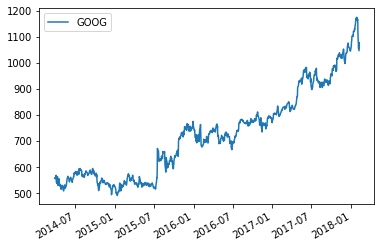

In [ ]:
goog.plot()

In [ ]:
# Using fucntion pct_change()
# pct_change formula's is = (Current - Previous / Previous) * 100

# Example for pct_change = (559.99 - 558.46/558.46) * 100 = 0.002736

goog_ret = np.log(goog.pct_change(1) + 1)
goog_ret

,GOOG
2014-03-27,NaN
2014-03-28,0.002736
2014-03-31,-0.005408
2014-04-01,0.018130
2014-04-02,-0.000282
...,...
2018-02-01,-0.001916
2018-02-02,-0.048966
2018-02-05,-0.051771
2018-02-06,0.023218


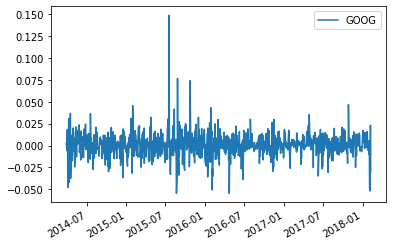

In [ ]:
goog_ret.plot()

In [ ]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean() # rolling() is for window size
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [ ]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

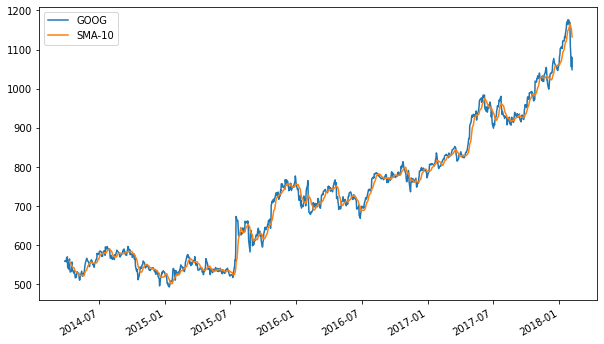

In [ ]:
goog.plot(figsize=(10, 6))

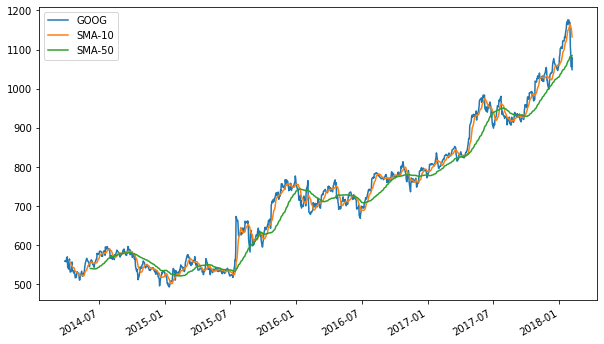

In [ ]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10, 6))

In [ ]:
goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

# because we have 2 columns data (GOOG and AAPL stocks), we gonna use cov() instead mean()
# cov() is function for covariance
# Covariance (atau kovarians) digunakan untuk mengukur besarnya hubungan antara dua variabel. 
# Jenis hubungan yang dapat terjadi atara dua buah variabel berdasarkan nilai covariance-nya adalah:

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [ ]:
cov.loc['2018-02-27'].to_numpy()
# to_numpy() function is used to return a NumPy ndarray 
# representing the values in given Series or Index.

array([], shape=(0, 2), dtype=float64)

In [ ]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head(), goog_aapl_ret.shape

(                GOOG      AAPL
 2014-03-27       NaN       NaN
 2014-03-28  0.002736 -0.001117
 2014-03-31 -0.005408 -0.000223
 2014-04-01  0.018130  0.009106
 2014-04-02 -0.000282  0.001661, (975, 2))

In [ ]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

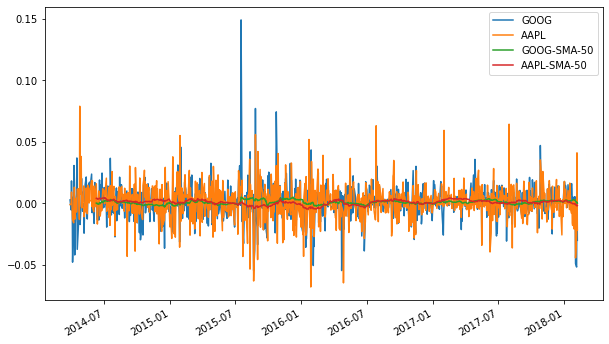

In [ ]:
goog_aapl_ret.plot(figsize=(10,6))

In [ ]:
cov = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).cov()
cov

GOOG-SMA-50   AAPL-SMA-50
2014-03-27 GOOG-SMA-50           NaN           NaN
           AAPL-SMA-50           NaN           NaN
2014-03-28 GOOG-SMA-50           NaN           NaN
           AAPL-SMA-50           NaN           NaN
2014-03-31 GOOG-SMA-50           NaN           NaN
...                              ...           ...
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

[1950 rows x 2 columns]

In [ ]:
corr = goog_aapl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)
# corr() is used to find the pairwise correlation 
# of all columns in the dataframe.

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000